In [1]:
from keras.datasets import reuters


In [4]:
(trainData, trainLabels), (testData, testLabels)=reuters.load_data(num_words=10000) # 가장많이 등장한 1만개의 단어

In [11]:
len(trainData) #8982
len(trainLabels) #8982
len(testData) #2246
len(testLabels) #2246

2246

In [16]:
trainData[10] #news articles
trainLabels[10] # 3 category

3

In [23]:
word_index=reuters.get_word_index() # get_word_index: 단어와 인덱스 확인 

reverseWordIndex=dict([(value, key) for (key, value) in word_index.items()])
#key, value의 자리를 바꿔서 dict로 저장 
reverseWordIndex

In [31]:
trainData.shape #8982
trainData[0]

[reverseWordIndex.get(i-3, '?') for i in trainData[0]] # 숫자(인덱스) 하나하나가 i에 들어간다
decoded_news=" ".join([reverseWordIndex.get(i-3, '?') for i in trainData[0]])
decoded_news

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [38]:
#데이터를 벡터로 변환
import numpy as np 

def vec_seq(seq, dimension=10000):
    res=np.zeros((len(seq), dimension)) # (8982, 10000)
    # print(res, res.shape) # 지금 다 0으로 들어간 상태
    # trainData[i]의 단어인덱스 ->해당하면 1로 바꿔줌. 
    for i, sequence in enumerate(seq):
        # print(i, sequence) # i = 문서의 번호 
        res[i, sequence]=1
    return res

xTrain = vec_seq(trainData)
xTest = vec_seq(testData)

In [41]:
print(xTrain, xTrain.shape)
print(xTest, xTest.shape)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]] (8982, 10000)
[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]] (2246, 10000)


In [48]:
#레이블->  벡터 변환 (원핫인코딩 )
def lab2OneHot(labels, dimension = 46):
    res=np.zeros((len(labels), dimension)) #(8982, 46)
    for i, label in enumerate(labels):
        res[i, label]=1
    return res

OneHotTrainLabels=lab2OneHot(trainLabels)
OneHotTestLabels=lab2OneHot(testLabels)

In [51]:
print(OneHotTrainLabels, OneHotTrainLabels.shape)
print(OneHotTestLabels, OneHotTestLabels.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] (8982, 46)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] (2246, 46)


In [52]:
OneHotTrainLabels[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [54]:
np.max(trainLabels) # 46개의 분류 

45

In [56]:
from keras.utils.np_utils import to_categorical # 이 3줄이 위의 것과 같아

OneHotTrainLabels2=to_categorical(trainLabels)
OneHotTestLabels2=to_categorical(testLabels)

In [57]:
OneHotTrainLabels2
OneHotTestLabels2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [78]:
from keras import models, layers

In [79]:
model = models.Sequential() # sequential 모델의 첫 번째 레이어:
model.add(layers.Dense(128, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
# 모델은 (*, 10000) 형태의 배열을 인풋으로 받고
# (*, 128) 형태의 배열을 출력합니다
# 첫 번째 레이어 이후에는,
# 인풋의 크기를 특정하지 않아도 됩니다:

In [80]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [81]:
xTrain.shape
xVal = xTrain[:1000] # 검증셋
pxTrain = xTrain[1000:] # 트레이닝 셋 
yVal = OneHotTrainLabels[:1000] # 검증셋
pyTrain = OneHotTrainLabels[1000:] # 트레이닝 셋 

In [82]:
history=model.fit(pxTrain, pyTrain, 
            epochs=30, batch_size=512,
            validation_data=(xVal, yVal))

Epoch 1/30
16/16 [==============================] - 1s 36ms/step - loss: 2.2888 - accuracy: 0.5678 - val_loss: 1.4677 - val_accuracy: 0.6970
Epoch 2/30
16/16 [==============================] - 1s 40ms/step - loss: 1.1739 - accuracy: 0.7511 - val_loss: 1.1379 - val_accuracy: 0.7450
Epoch 3/30
16/16 [==============================] - 1s 39ms/step - loss: 0.8261 - accuracy: 0.8290 - val_loss: 0.9819 - val_accuracy: 0.7910
Epoch 4/30
16/16 [==============================] - 1s 41ms/step - loss: 0.6042 - accuracy: 0.8766 - val_loss: 0.9368 - val_accuracy: 0.8010
Epoch 5/30
16/16 [==============================] - 1s 36ms/step - loss: 0.4495 - accuracy: 0.9062 - val_loss: 0.8858 - val_accuracy: 0.8100
Epoch 6/30
16/16 [==============================] - 1s 37ms/step - loss: 0.3507 - accuracy: 0.9273 - val_loss: 0.9204 - val_accuracy: 0.8110
Epoch 7/30
16/16 [==============================] - 1s 34ms/step - loss: 0.2643 - accuracy: 0.9414 - val_loss: 0.8754 - val_accuracy: 0.8210
Epoch 8/30
16

In [83]:
histDict=history.history
histDict.keys()
history.history['loss']

[2.2887635231018066,
 1.1738852262496948,
 0.8261059522628784,
 0.6041662693023682,
 0.449537068605423,
 0.350717693567276,
 0.2643364369869232,
 0.22501824796199799,
 0.1952495574951172,
 0.16995561122894287,
 0.1522272825241089,
 0.14143100380897522,
 0.13197080790996552,
 0.13028879463672638,
 0.12369531393051147,
 0.11489517986774445,
 0.11719939112663269,
 0.10939549654722214,
 0.10964492708444595,
 0.10580020397901535,
 0.10816516727209091,
 0.10330313444137573,
 0.10130196809768677,
 0.09855557978153229,
 0.0985785648226738,
 0.09818324446678162,
 0.09466402232646942,
 0.09580182284116745,
 0.09399918466806412,
 0.09055110812187195]

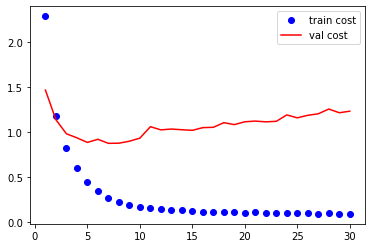

In [84]:
import matplotlib.pyplot as plt 
plt.plot(range(1, len(history.history['accuracy'])+1), history.history['loss'],'bo', label='train cost') # 1~30

plt.plot(range(1, len(history.history['accuracy'])+1), history.history['val_loss'],'r', label='val cost') # 1~30

plt.legend()

In [86]:
model = models.Sequential() # sequential 모델의 첫 번째 레이어:
model.add(layers.Dense(256, activation='relu', input_shape=(10000, ))) # 층 추가
model.add(layers.Dense(128, activation='relu')) # 히든계층
model.add(layers.Dense(64, activation='relu')) # 히든계층
model.add(layers.Dense(46, activation='softmax')) # 출력 계층
model.compile(optimizer='rmsprop', 
                loss='categorical_crossentropy', 
                metrics=['accuracy'])
model.fit(pxTrain, pyTrain, 
            epochs=30, batch_size=512,
            validation_data=(xVal, yVal))

result=model.evaluate(xTest, OneHotTestLabels)
print(result)

Epoch 1/30
16/16 [==============================] - 1s 49ms/step - loss: 2.3284 - accuracy: 0.5226 - val_loss: 1.4504 - val_accuracy: 0.6840
Epoch 2/30
16/16 [==============================] - 1s 42ms/step - loss: 1.1774 - accuracy: 0.7325 - val_loss: 1.3099 - val_accuracy: 0.7080
Epoch 3/30
16/16 [==============================] - 1s 46ms/step - loss: 0.8088 - accuracy: 0.8192 - val_loss: 1.2338 - val_accuracy: 0.7170
Epoch 4/30
16/16 [==============================] - 1s 43ms/step - loss: 0.5765 - accuracy: 0.8723 - val_loss: 1.0295 - val_accuracy: 0.7780
Epoch 5/30
16/16 [==============================] - 1s 45ms/step - loss: 0.3937 - accuracy: 0.9162 - val_loss: 1.0021 - val_accuracy: 0.7790
Epoch 6/30
16/16 [==============================] - 1s 43ms/step - loss: 0.3004 - accuracy: 0.9330 - val_loss: 0.9391 - val_accuracy: 0.8130
Epoch 7/30
16/16 [==============================] - 1s 47ms/step - loss: 0.2281 - accuracy: 0.9426 - val_loss: 0.9857 - val_accuracy: 0.7990
Epoch 8/30
16

In [97]:
predictions=model.predict(xTest)# (2246, 46) # 분류가 46개 이니까 
np.sum(predictions[0])
np.max(predictions[0])
# np.argmax(predictions[0]) # 3번 category

0.9942888

In [ ]:
#오늘 평가 대체 연습문제 